<a href="https://colab.research.google.com/github/arlenkim/study/blob/main/55C3_US_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/content/drive/MyDrive/Colab Notebooks/11-15.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/11-15.ipynb
/content/drive/MyDrive/Colab Notebooks/b52_Regression.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/wine.ipynb
/content/drive/MyDrive/Colab Notebooks/mushroom.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/car_evaluation.csv
/content/drive/MyDrive/Colab Notebooks/car_evaluation.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/mushroom.ipynb
/content/drive/MyDrive/Colab Notebooks/55C3_US_3rd_data.csv
/content/drive/MyDrive/Colab Notebooks/b56_DT_RF_Boost_Reg.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb의 사본 (1)
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb
/content/drive/MyDrive/Colab Notebooks/65C3_US_RFR.ipynb


In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [3]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/f

In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (36.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [10]:
# DATA 다운
#data = pd.read_csv("https://raw.githubusercontent.com/arlenkim/study/main/65C3_GI_CFM_TOTAL_all.csv",encoding='euc-kr')

In [5]:
data = '//content/drive/MyDrive/Colab Notebooks/55C3_US_3rd_data.csv'
df =pd.read_csv(data, encoding='euc-kr', header=1)
#df = df.drop(df.columns[0], axis=1)

In [6]:
# view dimensions of dataset

df.head(5)

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3,작업일시.6,박스바코드
0,3,2022-11-07,1,2022-11-07 8:19,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N73001,배출,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
1,3,2022-11-07,2,2022-11-07 8:19,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N73002,단변,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2,3,2022-11-07,7,2022-11-07 10:30,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N73007,배출,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
3,3,2022-11-07,8,2022-11-07 10:30,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N73008,배출,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
4,3,2022-11-07,9,2022-11-07 10:30,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N73009,배출,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN


In [7]:
df.shape

(2692, 272)

In [11]:
#df3.columns[0:290]

In [12]:
#for i in range(7, 11): 
  #df2 = df.drop(['i:사용여부'], axis=1)

In [8]:
df2 = df.drop(['작업일자', '순번','모델번호', '모델코드', '모델이름','최종공정','선택','탱크온도', '호스온도', '노즐온도','작업일시','작업일시.1', '작업일시.2','작업횟수','작업일시.3', '작업횟수.1','작업일시.4', '작업일시.5','작업일시.6', '박스바코드',
               '1:사용여부','1:평균출력2','1:평균출력3',
               '2:사용여부','2:평균출력2','2:평균출력3',
               '3:사용여부','3:평균출력2','3:평균출력3',
               '4:사용여부','4:평균출력2','4:평균출력3',
               '5:사용여부','5:평균출력2','5:평균출력3',
               '6:사용여부','6:평균출력2','6:평균출력3',
               '7:사용여부','7:평균출력2','7:평균출력3',
               '8:사용여부','8:평균출력2','8:평균출력3',
               '9:사용여부','9:평균출력2','9:평균출력3',
               '10:사용여부','10:평균출력2','10:평균출력3',
               '11:사용여부','11:평균출력2','11:평균출력3',
               '12:사용여부','12:평균출력2','12:평균출력3',
               '13:사용여부','13:평균출력2','13:평균출력3',
               '14:사용여부','14:평균출력2','14:평균출력3',
               '15:사용여부','15:평균출력2','15:평균출력3',
               '16:사용여부','16:평균출력2','16:평균출력3',
               '17:사용여부','17:평균출력2','17:평균출력3',
               '18:사용여부','18:평균출력2','18:평균출력3',
               '19:사용여부','19:평균출력2','19:평균출력3',
               '20:사용여부','20:평균출력2','20:평균출력3',
               '21:사용여부','21:평균출력2','21:평균출력3',
               '22:사용여부','22:평균출력2','22:평균출력3',
               '23:사용여부','23:평균출력2','23:평균출력3',
               '24:사용여부','24:평균출력2','24:평균출력3',
               '1:압력', '1:시간', '1:진폭', '1:주파수',
               '2:압력', '2:시간', '2:진폭', '2:주파수',
               '3:압력', '3:시간', '3:진폭', '3:주파수',
               '4:압력', '4:시간', '4:진폭', '4:주파수',
               '5:압력', '5:시간', '5:진폭', '5:주파수',
               '6:압력', '6:시간', '6:진폭', '6:주파수',
               '7:압력', '7:시간', '7:진폭', '7:주파수',
               '8:압력', '8:시간', '8:진폭', '8:주파수',
               '9:압력', '9:시간', '9:진폭', '9:주파수',
               '10:압력', '10:시간', '10:진폭', '10:주파수',
               '11:압력', '11:시간', '11:진폭', '11:주파수',
               '12:압력', '12:시간', '12:진폭', '12:주파수',
               '13:압력', '13:시간', '13:진폭', '13:주파수',
               '14:압력', '14:시간', '14:진폭', '14:주파수',
               '15:압력', '15:시간', '15:진폭', '15:주파수',
               '16:압력', '16:시간', '16:진폭', '16:주파수',
               '17:압력', '17:시간', '17:진폭', '17:주파수',
               '18:압력', '18:시간', '18:진폭', '18:주파수',
               '19:압력', '19:시간', '19:진폭', '19:주파수',
               '20:압력', '20:시간', '20:진폭', '20:주파수',
               '21:압력', '21:시간', '21:진폭', '21:주파수',
               '22:압력', '22:시간', '22:진폭', '22:주파수',
               '23:압력', '23:시간', '23:진폭', '23:주파수',
               '24:압력', '24:시간', '24:진폭', '24:주파수',               
               ], axis=1)

In [9]:
df2.shape

(2692, 84)

In [10]:
df2.head()

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,...,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
0,3,2022-11-07 8:19,SACQ30454407KFA2N73001,3670,2074,1936.0,3718,1986,1933.0,3824,...,984,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,3,2022-11-07 8:19,SACQ30454407KFA2N73002,3696,1987,1929.0,3719,2073,1934.0,3754,...,984,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,3,2022-11-07 10:30,SACQ30454407KFA2N73007,4036,2225,2176.0,4170,2513,2185.0,4540,...,852,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,3,2022-11-07 10:30,SACQ30454407KFA2N73008,3585,2066,2009.0,3812,2222,1991.0,4501,...,945,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
4,3,2022-11-07 10:30,SACQ30454407KFA2N73009,3744,2157,2114.0,3860,2370,2022.0,4493,...,898,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [23]:
df2.dtypes

라인          int64
생성일시       object
바코드        object
1:에너지       int64
1:최대출력      int64
           ...   
판정.1       object
좌측        float64
판정.2       object
우측        float64
판정.3       object
Length: 84, dtype: object

In [24]:
df2.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,...,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,상부,하부,좌측,우측
count,2692.0,2692.000000,2692.000000,2683.000000,2692.000000,2692.000000,2683.000000,2692.000000,2692.000000,2683.000000,...,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000
mean,3.0,3722.560178,2223.812036,2006.391353,3599.845468,2214.320579,1969.168841,3842.892645,2257.794577,2098.042117,...,3249.056464,2141.725111,1988.570208,1962.380758,1233.670877,1165.943165,-1.037069,-1.653332,-0.690810,-0.276196
std,0.0,312.162587,193.126063,116.947398,323.419250,181.107047,116.347339,283.839917,163.245811,83.217849,...,240.342119,135.744575,139.234284,194.192347,110.466045,110.661442,0.628164,0.514329,0.259364,0.275121
min,3.0,0.000000,0.000000,1523.000000,0.000000,0.000000,1610.000000,0.000000,0.000000,1611.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.730000,-4.230000,-1.650000,-1.220000
25%,3.0,3591.000000,2120.000000,1935.500000,3459.000000,2134.000000,1897.000000,3770.000000,2202.000000,2054.000000,...,3161.000000,2113.000000,1947.000000,1929.000000,1192.000000,1136.000000,-1.380000,-1.912500,-0.810000,-0.380000
50%,3.0,3756.500000,2229.000000,2014.000000,3562.000000,2219.000000,1951.000000,3861.000000,2259.000000,2100.000000,...,3259.000000,2149.000000,2000.000000,2003.000000,1246.000000,1184.000000,-1.170000,-1.640000,-0.660000,-0.200000
75%,3.0,3891.000000,2340.000000,2083.000000,3697.000000,2307.000000,2024.000000,3948.000000,2320.000000,2144.500000,...,3361.000000,2180.000000,2045.000000,2069.000000,1294.000000,1227.000000,-0.950000,-1.380000,-0.530000,-0.090000
max,3.0,4342.000000,2587.000000,2312.000000,4755.000000,2636.000000,2375.000000,4758.000000,2861.000000,2474.000000,...,3654.000000,2374.000000,2271.000000,2337.000000,1497.000000,1417.000000,0.910000,0.530000,0.020000,0.310000


In [11]:
df2.isnull().sum()

라인         0
생성일시       0
바코드        0
1:에너지      0
1:최대출력     0
          ..
판정.1      28
좌측         0
판정.2      28
우측         0
판정.3      28
Length: 84, dtype: int64

In [12]:
df2 = df2.replace(0, np.NaN)

In [13]:
df3 =df2.dropna(axis=0) 
df3.shape

(2579, 84)

In [14]:
df3.isnull().sum()

라인        0
생성일시      0
바코드       0
1:에너지     0
1:최대출력    0
         ..
판정.1      0
좌측        0
판정.2      0
우측        0
판정.3      0
Length: 84, dtype: int64

In [16]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 60

In [17]:
df3.sort_values(by='10:평균출력1',ascending=False)

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,8:에너지,8:최대출력,8:평균출력1,9:에너지,9:최대출력,9:평균출력1,10:에너지,10:최대출력,10:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,18:에너지,18:최대출력,18:평균출력1,19:에너지,19:최대출력,19:평균출력1,20:에너지,20:최대출력,20:평균출력1,21:에너지,21:최대출력,21:평균출력1,22:에너지,22:최대출력,22:평균출력1,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
14,3,2022-11-07 11:53,SACQ30454407KFA2N7300M,3626.0,2147.0,1926.0,4000.0,2362.0,2140.0,4518.0,2861.0,2353.0,3886.0,2224.0,2077.0,5323.0,2979.0,2777.0,3745.0,2824.0,2055.0,5001.0,2886.0,2653.0,2653.0,1774.0,1586.0,3061.0,2053.0,1851.0,3983.0,2726.0,2443.0,3224.0,2048.0,1886.0,3604.0,2545.0,2241.0,2907.0,2090.0,1961.0,3051.0,1888.0,1802.0,1714.0,1160.0,974.0,3426.0,2086.0,2055.0,3858.0,2421.0,2303.0,3577.0,2193.0,2161.0,3519.0,2382.0,2063.0,3664.0,2522.0,2272.0,3724.0,2332.0,2259.0,3524.0,2173.0,2116.0,3445.0,2372.0,2108.0,1328.0,1108.0,866.0,合,-1.98,合,-1.95,合,-0.94,合,-0.62,合
240,3,2022-11-07 17:19,SACQ30454407KFA2N7307P,3930.0,2116.0,2055.0,4157.0,2296.0,2170.0,4256.0,2463.0,2297.0,4741.0,2876.0,2536.0,4334.0,2556.0,2282.0,4569.0,2776.0,2393.0,5014.0,2784.0,2687.0,2530.0,1677.0,1508.0,2998.0,2063.0,1833.0,4009.0,2647.0,2443.0,2937.0,1968.0,1782.0,2956.0,1950.0,1821.0,2453.0,1775.0,1775.0,2599.0,1863.0,1528.0,1874.0,1156.0,1081.0,3318.0,2038.0,1991.0,3719.0,2293.0,2230.0,3397.0,2084.0,2025.0,3249.0,2186.0,1890.0,3467.0,2290.0,2059.0,3616.0,2222.0,2165.0,3315.0,2048.0,1986.0,3479.0,2239.0,2107.0,1636.0,1075.0,997.0,合,-1.01,合,-2.09,合,-0.68,合,-0.27,合
208,3,2022-11-07 17:03,SACQ30454407KFA2N7306R,3969.0,2207.0,2073.0,4340.0,2376.0,2294.0,4186.0,2473.0,2271.0,4539.0,2695.0,2461.0,4421.0,2535.0,2330.0,4797.0,2913.0,2526.0,4933.0,2863.0,2597.0,2788.0,1857.0,1610.0,3356.0,2288.0,2005.0,4066.0,2669.0,2420.0,3087.0,2142.0,1844.0,3336.0,2155.0,1993.0,2438.0,2031.0,2031.0,2300.0,1707.0,1336.0,1774.0,1206.0,1034.0,3341.0,2097.0,1986.0,3613.0,2181.0,2140.0,3427.0,2070.0,2011.0,3440.0,2286.0,2022.0,3579.0,2357.0,2143.0,3593.0,2200.0,2120.0,3257.0,1974.0,1943.0,3375.0,2089.0,2027.0,1742.0,1160.0,1054.0,不,-2.30,不,-2.92,合,-1.37,合,-1.22,合
17,3,2022-11-07 12:05,SACQ30454407KFA2N7300Q,3745.0,2133.0,2098.0,3953.0,2374.0,2157.0,4166.0,2404.0,2338.0,4723.0,2721.0,2545.0,4532.0,2518.0,2353.0,4416.0,2794.0,2315.0,4513.0,2773.0,2421.0,3751.0,2407.0,2297.0,3659.0,2665.0,2310.0,4011.0,2620.0,2397.0,3432.0,2186.0,2020.0,3371.0,2224.0,2043.0,2962.0,1934.0,1912.0,2869.0,1874.0,1660.0,1788.0,1260.0,1004.0,3321.0,2094.0,1970.0,3799.0,2307.0,2252.0,3496.0,2200.0,2113.0,3367.0,2254.0,1968.0,3697.0,2398.0,2214.0,3771.0,2329.0,2291.0,3573.0,2215.0,2117.0,3511.0,2166.0,2117.0,1432.0,1025.0,908.0,不,-2.76,不,-2.77,合,-1.28,合,-0.84,合
244,3,2022-11-07 17:21,SACQ30454407KFA2N7307T,3847.0,2112.0,2001.0,4353.0,2461.0,2338.0,4329.0,2434.0,2314.0,4395.0,2588.0,2369.0,4481.0,2524.0,2391.0,4486.0,2948.0,2273.0,4784.0,2805.0,2552.0,2832.0,1843.0,1751.0,3294.0,2390.0,2111.0,3926.0,2528.0,2397.0,3065.0,2272.0,1977.0,3312.0,2178.0,2080.0,2601.0,2013.0,2013.0,2616.0,1835.0,1578.0,1822.0,1136.0,1042.0,3456.0,2094.0,2051.0,3412.0,2189.0,2018.0,3532.0,2188.0,2117.0,3304.0,2132.0,1895.0,3634.0,2355.0,2177.0,3571.0,2185.0,2114.0,3396.0,2073.0,2021.0,3511.0,2220.0,2118.0,1665.0,1151.0,1013.0,合,-0.93,合,-2.03,合,-0.76,合,-0.06,合
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,3,2022-11-14 11:52,SACQ30454407KFA2NE30BL,3718.0,2189.0,1980.0,3496.0,2203.0,1909.0,3820.0,2250.0,2074.0,4201.0,2330.0,2181.0,4249.0,2497.0,2278

In [31]:
df3.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,8:에너지,8:최대출력,8:평균출력1,9:에너지,9:최대출력,9:평균출력1,10:에너지,10:최대출력,10:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,18:에너지,18:최대출력,18:평균출력1,19:에너지,19:최대출력,19:평균출력1,20:에너지,20:최대출력,20:평균출력1,21:에너지,21:최대출력,21:평균출력1,22:에너지,22:최대출력,22:평균출력1,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,상부,하부,좌측,우측
count,2579.0,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000
mean,3.0,3735.146568,2231.345095,2006.200078,3609.573090,2220.822024,1968.268709,3852.039162,2263.144630,2096.397053,4300.478480,2497.552927,2302.520357,4190.988755,2434.274137,2278.382319,4254.535867,2437.907716,2225.433501,4734.357115,2729.458705,2559.465297,2509.912757,1673.370686,1482.935634,2902.718496,1976.567274,1745.941450,2908.778209,1940.637844,1738.763086,2880.045754,1923.989531,1722.582784,3000.880574,2012.310585,1828.270260,2468.801861,1840.559519,1835.338503,2442.604498,1740.386972,1405.065142,1990.476541,1294.404808,1166.228771,3267.459093,2017.739434,1964.792555,3462.671578,2291.731291,2079.870105,3301.860023,2090.791004,1993.068631,3287.681272,2044.974409,1938.191547,3586.607988,2265.408298,2114.378829,3481.609539,2194.406747,2071.915471,3234.751842,2097.174098,1966.010469,3258.961613,2148.142303,1994.583947,1972.271423,1239.379604,1171.514153,-1.054901,-1.677429,-0.703959,-0.285987
std,0.0,226.430190,144.693707,117.044449,246.277541,128.230717,116.193875,170.301987,93.631114,81.265260,238.149122,168.384304,132.376370,226.374074,86.261526,112.406087,241.359390,198.095885,125.424371,182.271990,117.486517,88.294713,189.691947,124.826088,118.894721,229.353621,186.927143,146.231583,363.459770,224.491643,223.642876,180.905738,137.994666,112.794899,173.594839,129.688689,106.325697,199.615921,157.079889,157.962943,150.375089,123.173882,87.375000,147.744886,106.880648,95.939475,80.730510,54.883150,47.575957,105.355401,80.665004,65.770033,118.818352,63.030582,65.954091,135.937446,100.081980,76.554907,83.829384,61.294394,54.816659,110.936478,52.757640,75.741869,126.453948,49.625185,72.019265,149.024700,53.908597,77.936027,152.750244,82.571156,85.572277,0.619596,0.486100,0.251003,0.275698
min,3.0,2858.000000,1677.000000,1523.000000,2923.000000,1783.000000,1610.000000,3021.000000,1964.000000,1611.000000,3307.000000,1872.000000,1772.000000,4.000000,1689.000000,1400.000000,2501.000000,1687.000000,1432.000000,3994.000000,2299.000000,2208.000000,2038.000000,1249.000000,1167.000000,2242.000000,1472.000000,1324.000000,2109.000000,1366.000000,1204.000000,2291.000000,1423.000000,1343.000000,2305.000000,1572.000000,1415.000000,1927.000000,1360.000000,1360.000000,1995.000000,1241.000000,1084.000000,1495.000000,990.000000,907.000000,2894.000000,1795.000000,1746.000000,3141.000000,1981.000000,1875.000000,2811.000000,1872.000000,1755.000000,2195.000000,1419.000000,1374.000000,3251.000000,1987.000000,1905.000000,3141.000000,1945.000000,1805.000000,2834.000000,1904.000000,167

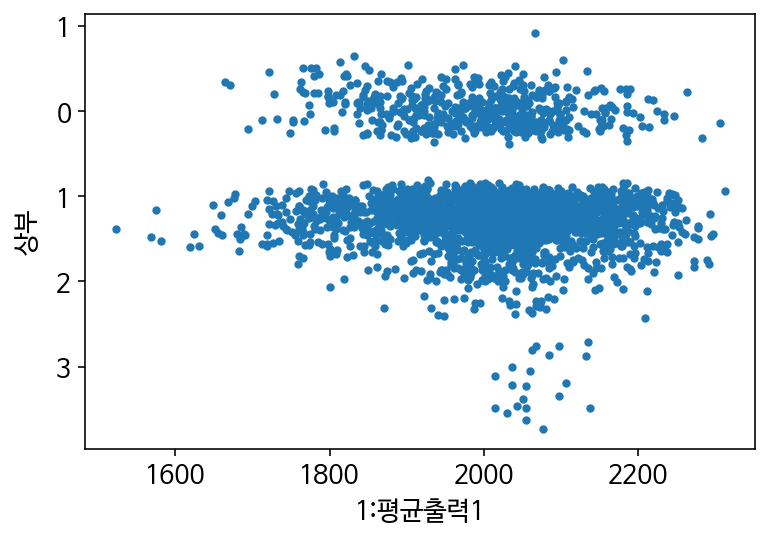

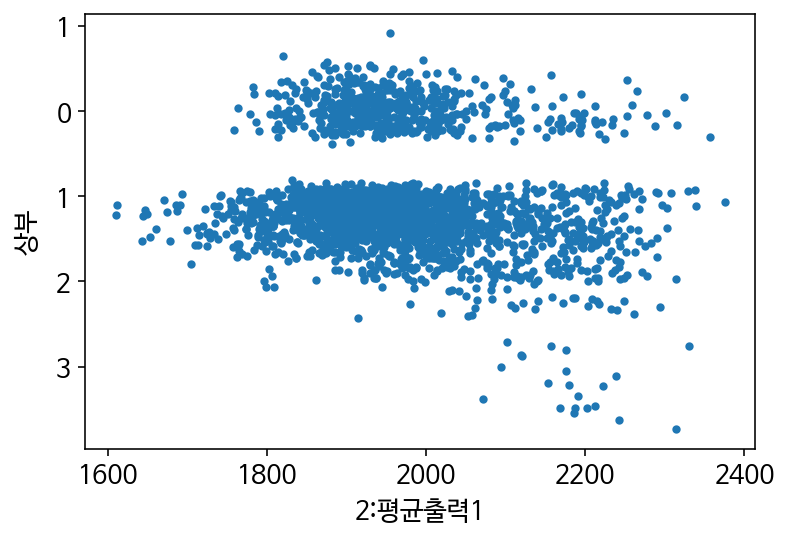

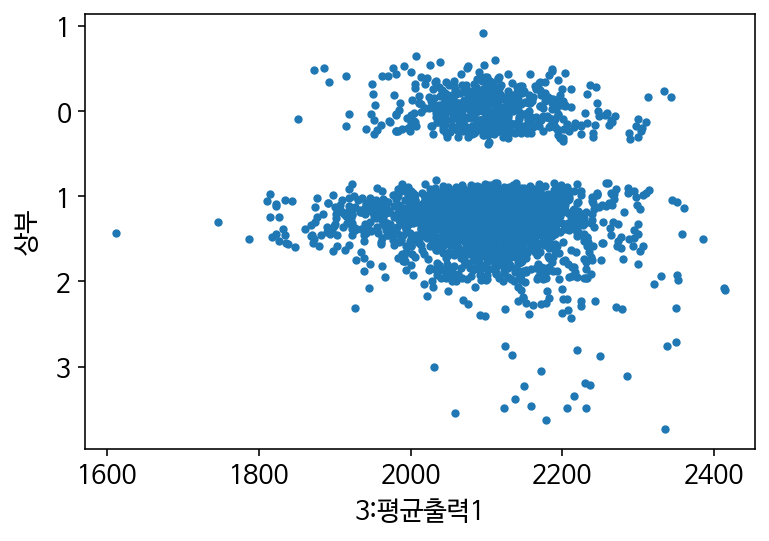

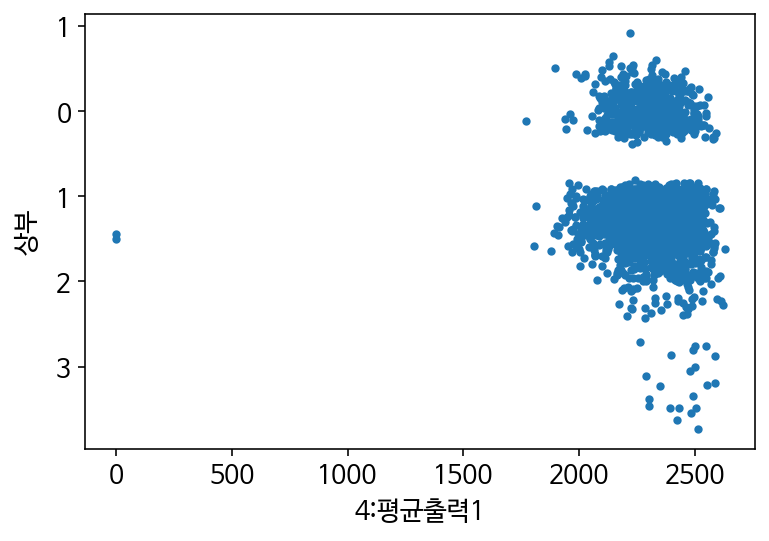

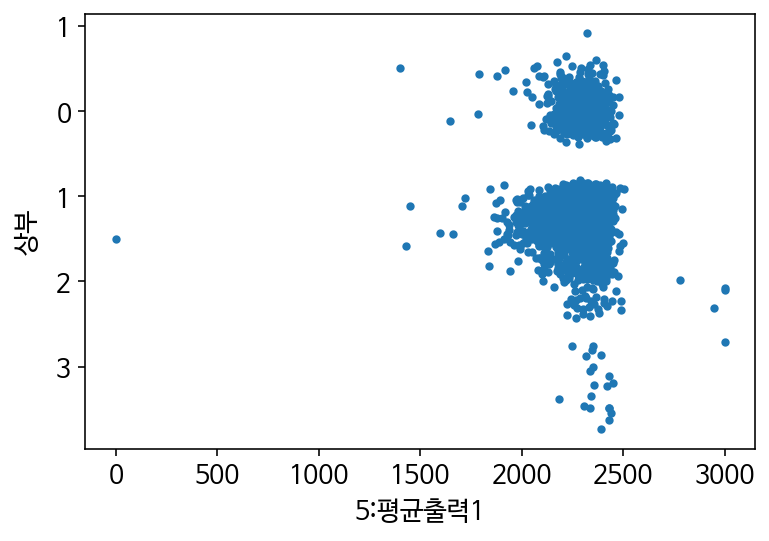

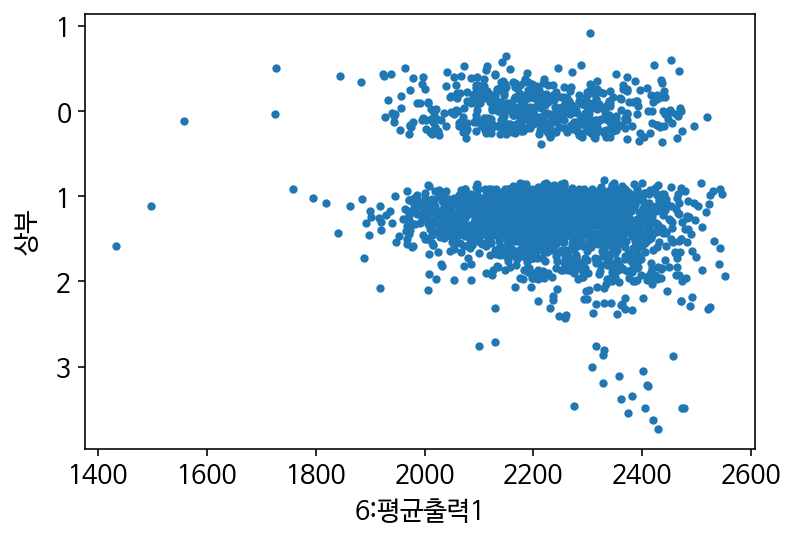

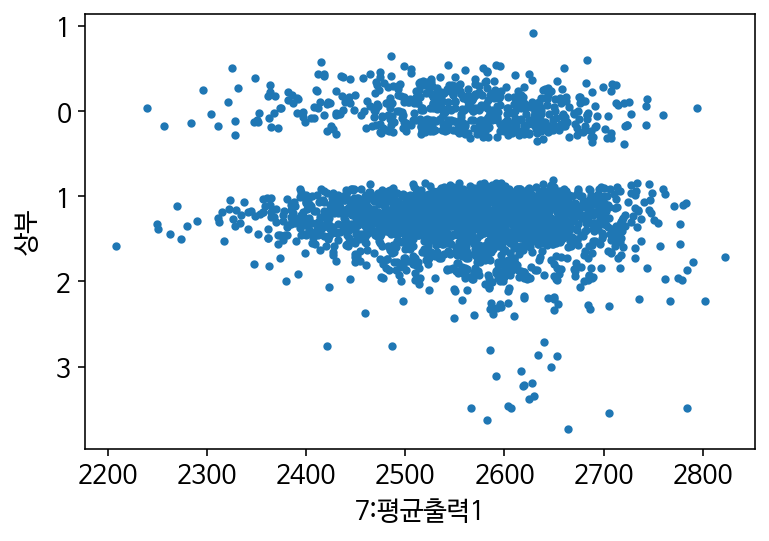

In [19]:
for col in ["1:평균출력1", "2:평균출력1","3:평균출력1","4:평균출력1","5:평균출력1", "6:평균출력1","7:평균출력1"]:
    plt.scatter(df3[col] , df3['상부'], s=10)
    plt.ylabel('상부')
    plt.xlabel(col)
    plt.show()

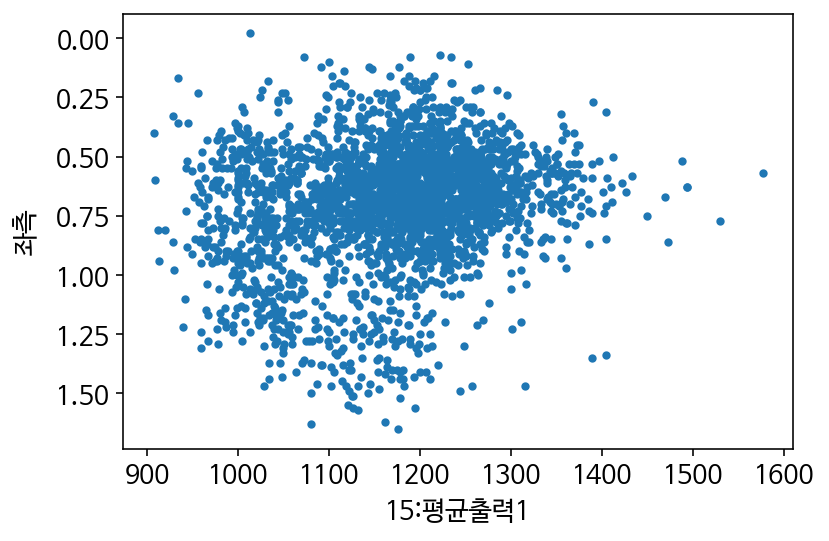

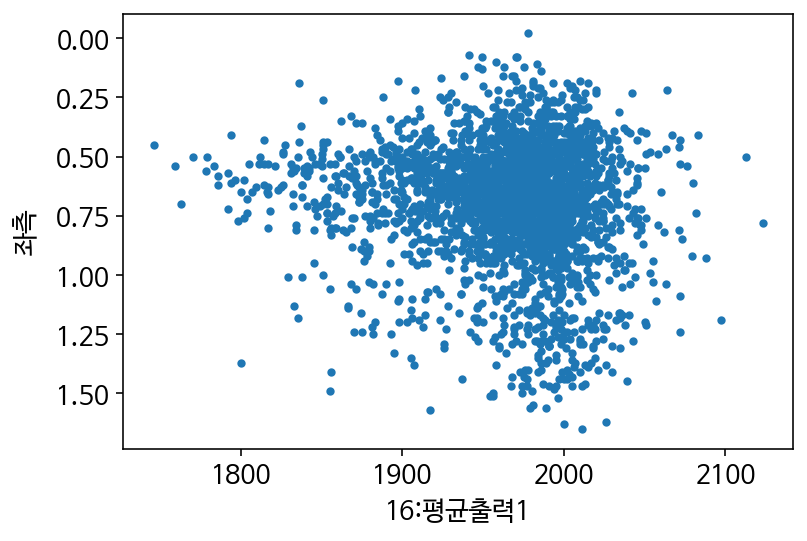

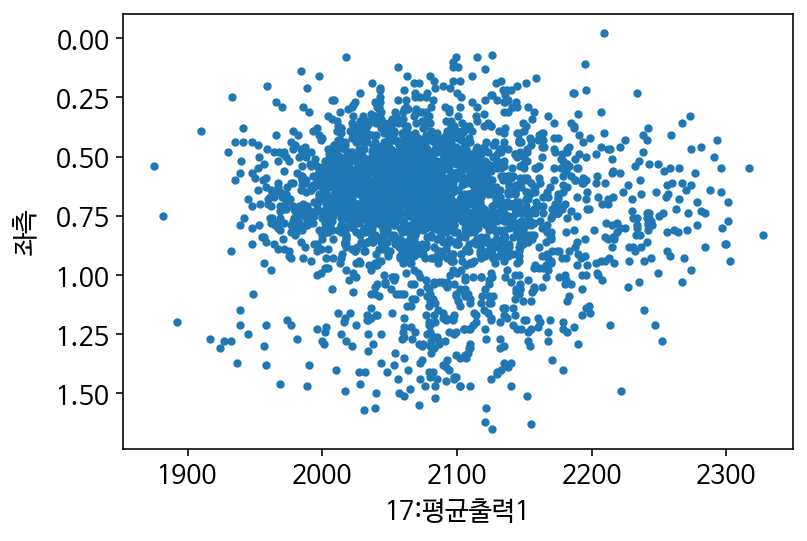

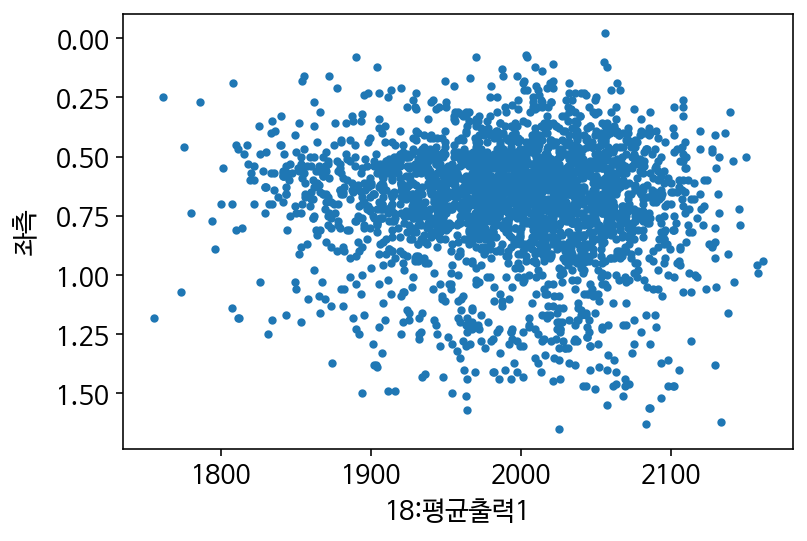

In [26]:
for col in ["15:평균출력1", "16:평균출력1","17:평균출력1","18:평균출력1"]:
    plt.scatter(df3[col] , df3['좌측'], s=10)
    plt.ylabel('좌측')
    plt.xlabel(col)
    plt.show()

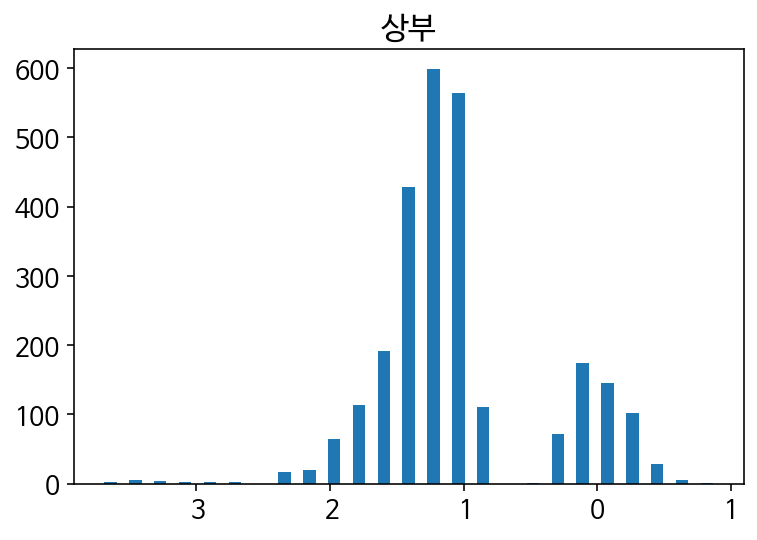

In [32]:
for col in ["상부"]:
    plt.hist(df3[col], bins=25, rwidth=0.5)
    plt.title(col)
    plt.show()

In [56]:
## 훈련 데이터와 검증 데이터 준비

features = df3.columns.difference(["라인", "생성일시", "바코드","종합판정", "판정", "하부", "판정.1", "좌측", "판정.2", "우측", "판정.3","상부",
       '1:에너지1', '1:최대출력', 
       '2:에너지1', '2:최대출력', 
       '3:에너지1', '3:최대출력', 
       '4:에너지1', '4:최대출력', 
       '5:에너지1', '5:최대출력', 
       '6:에너지1', '6:최대출력', 
       '7:에너지1', '7:최대출력', 
       '8:에너지1', '8:최대출력', 
       '9:에너지1', '9:최대출력', 
       '10:에너지1', '10:최대출력', 
       '11:에너지1', '11:최대출력', 
       '12:에너지1', '12:최대출력', 
       '13:에너지1', '13:최대출력', 
       '14:에너지1', '14:최대출력', 
       '15:에너지1', '15:최대출력',
       '16:에너지1', '16:최대출력', 
       '17:에너지1', '17:최대출력', 
       '18:에너지1', '18:최대출력', 
       '19:에너지1', '19:최대출력', 
       '20:에너지1', '20:최대출력', 
       '21:에너지1', '21:최대출력', 
       '22:에너지1', '22:최대출력', 
       '23:에너지1', '23:최대출력', 
       '24:에너지1', '24:최대출력',
      ])
X = df3[features]
y = df3["상부"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 , random_state=9, shuffle=True)

In [57]:
X_train.shape, X_test.shape

((1547, 48), (1032, 48))

In [47]:
X_train.sort_values(by='1:평균출력1',ascending=False)

,10:평균출력1,11:평균출력1,12:평균출력1,13:평균출력1,14:평균출력1,15:평균출력1,16:평균출력1,17:평균출력1,18:평균출력1,19:평균출력1,1:평균출력1,20:평균출력1,21:평균출력1,22:평균출력1,23:평균출력1,24:평균출력1,2:평균출력1,3:평균출력1,4:평균출력1,5:평균출력1,6:평균출력1,7:평균출력1,8:평균출력1,9:평균출력1
827,1649.0,1738.0,1826.0,1856.0,1474.0,1244.0,1969.0,2066.0,2049.0,1992.0,2297.0,2133.0,2160.0,1910.0,2001.0,1189.0,2059.0,2190.0,2507.0,2268.0,2288.0,2712.0,1491.0,2007.0
824,1651.0,1779.0,1890.0,2013.0,1406.0,1276.0,1993.0,2067.0,2053.0,2000.0,2295.0,2161.0,2043.0,1997.0,1987.0,1124.0,1956.0,2102.0,2368.0,2059.0,2167.0,2655.0,1510.0,1795.0
1219,1774.0,1832.0,1905.0,2030.0,1459.0,1248.0,1959.0,2054.0,1942.0,2002.0,2293.0,2172.0,2085.0,2013.0,2090.0,1274.0,2141.0,2239.0,2477.0,2451.0,2468.0,2700.0,1511.0,1645.0
1521,1626.0,1769.0,1930.0,2064.0,1437.0,1230.0,1995.0,1989.0,2028.0,1958.0,2292.0,2129.0,2092.0,2006.0,1939.0,1125.0,2078.0,2087.0,2330.0,2179.0,2263.0,2477.0,1439.0,1925.0
1483,1751.0,1753.0,1818.0,2061.0,1544.0,1163.0,1987.0,2061.0,1963.0,1892.0,2289.0,2171.0,2164.0,1922.0,2040.0,1140.0,2034.0,2204.0,2524.0,2098.0,2316.0,2604.0,1628.0,1752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,1666.0,1713.0,1876.0,1699.0,1261.0,1080.0,1964.0,2107.0,1934.0,1796.0,1624.0,2132.0,1953.0,1954.0,2062.0,1174.0,1748.0,1894.0,2067.0,2022.0,2032.0,2450.0,1405.0,1620.0
502,1472.0,1690.0,1815.0,1630.0,1299.0,1129.0,1910.0,2125.0,1834.0,1771.0,1619.0,2055.0,2153.0,1907.0,1963.0,1134.0,1757.0,1847.0,2044.0,2122.0,1977.0,2491.0,1352.0,1644.0
495,1523.0,1638.0,1826.0,1711.0,1232.0,1113.0,2049.0,2148.0,1931.0,1852.0,1582.0,2122.0,2128.0,1922.0,2009.0,1112.0,1643.0,1826.0,2009.0,2155.0,2162.0,2499.0,1338.0,1619.0
422,2146.0,1656.0,1677.0,1804.0,1373.0,1163.0,1986.0,2018.0,2019.0,1910.0,1568.0,2222.0,2060.0,2009.0,2019.0,1199.0,1653.0,1817.0,2279.0,2283.0,2155.0,2658.0,1470.0,1538.0


depth:  3 , R-squared:  0.0716


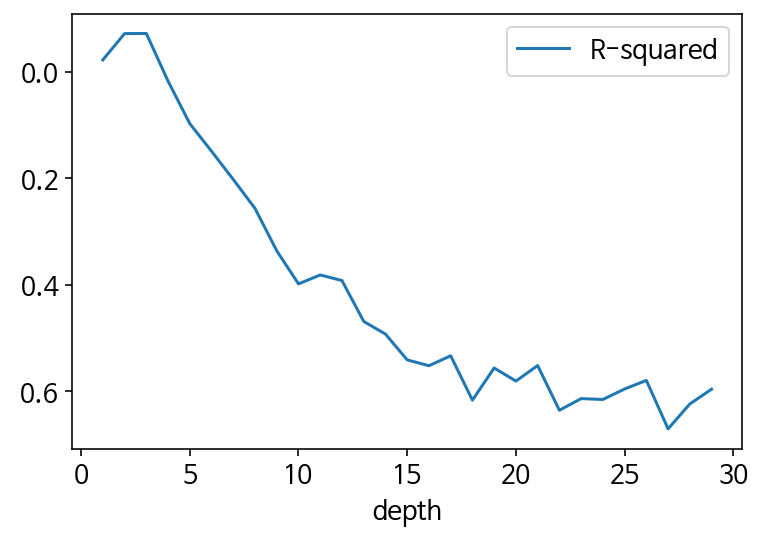

In [58]:
## 결정 트리를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    dtr = DecisionTreeRegressor(max_depth=depth) 
    dtr.fit(X_train, y_train) 
    res.append((depth, dtr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

In [26]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [27]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

Max Error:  2.955
Mean Absolute Error:  0.502
Root Mean Squared Error:  0.706
R-Squared:  -0.25


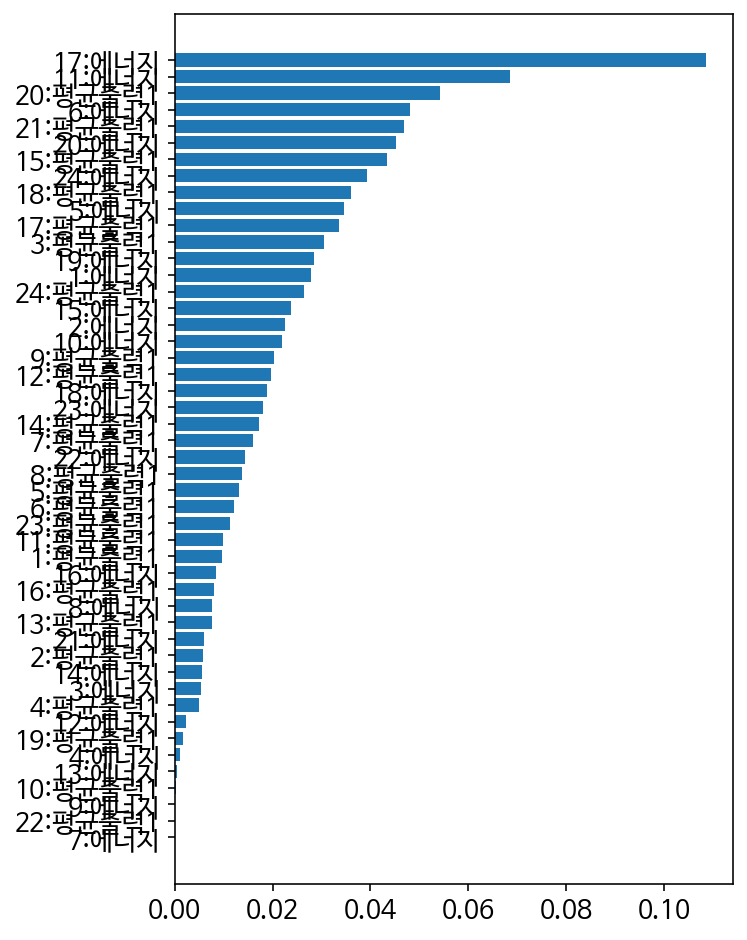

In [59]:
## 결정 트리 모델 성능 확인

dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, dtr.feature_importances_)

depth:  21 , R-squared:  0.215


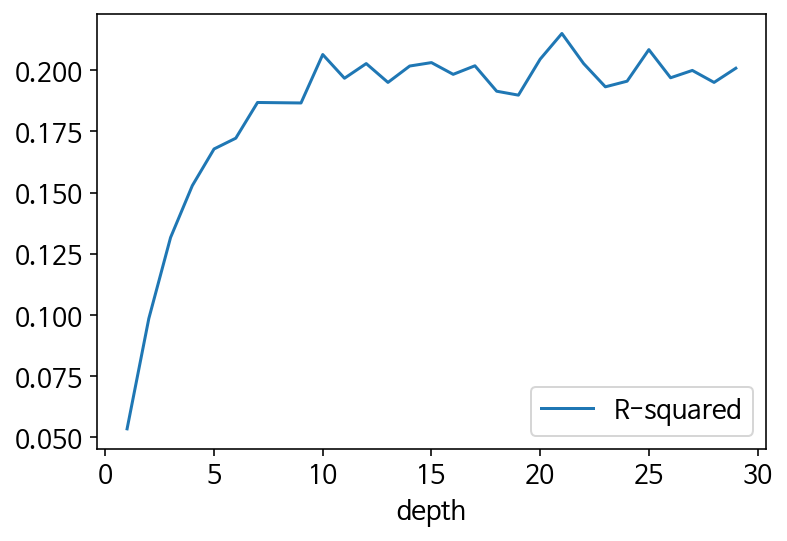

In [60]:
## 랜덤 포레스트를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y_train) 
    res.append((depth, rfr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  2.063
Mean Absolute Error:  0.424
Root Mean Squared Error:  0.565
R-Squared:  0.201


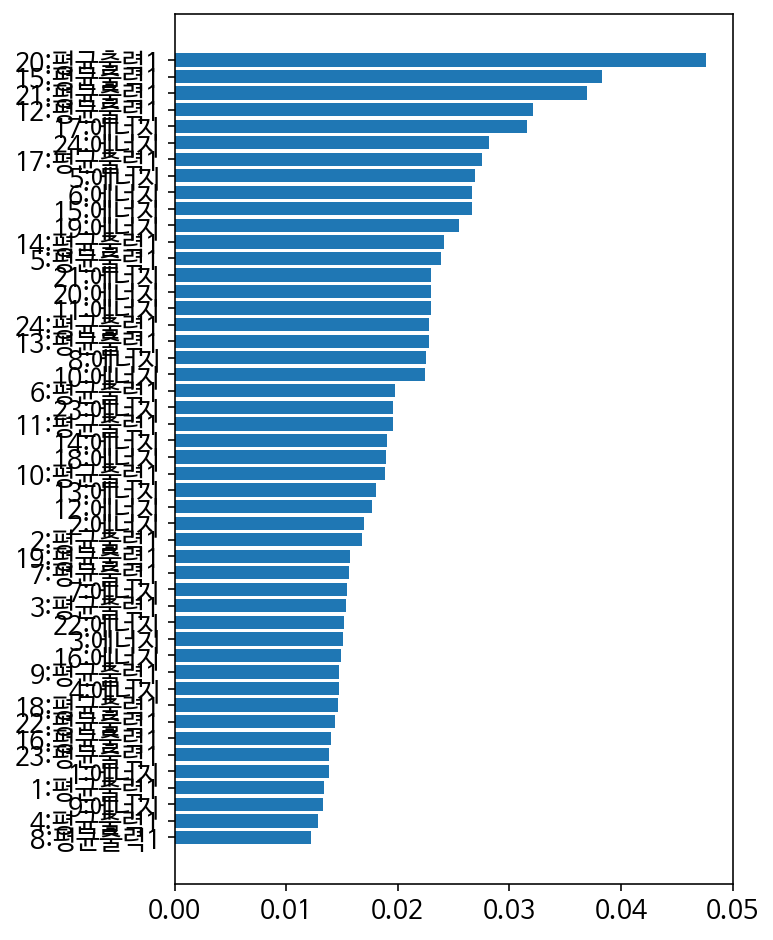

In [61]:
## 랜덤 포레스트 모델 성능 확인

rfr = RandomForestRegressor(max_depth=18)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

depth:  15 , R-squared:  0.2301


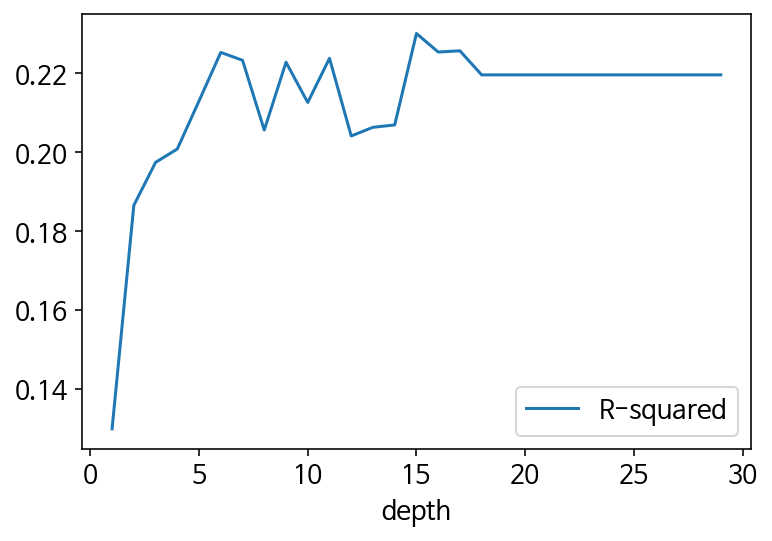

In [62]:
## LightGBM 부스팅 모델을 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    lgbm_r = LGBMRegressor(max_depth=depth, num_leaves=32) 
    lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
    res.append((depth, lgbm_r.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  1.947
Mean Absolute Error:  0.42
Root Mean Squared Error:  0.558
R-Squared:  0.22


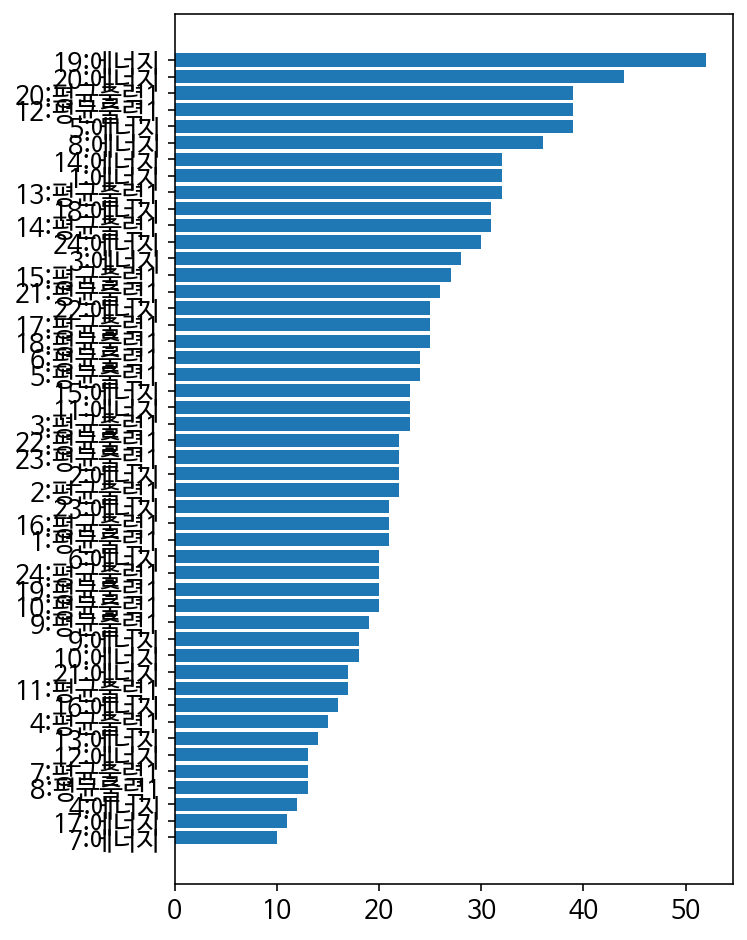

In [63]:
## 부스팅 모델 성능 확인

lgbm_r = LGBMRegressor(max_depth=19, num_leaves=32)
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, lgbm_r.feature_importances_)

In [50]:
y_test

2302   -1.15
204    -1.63
2503   -1.30
2523   -1.23
1528   -1.95
        ... 
1464   -1.22
304    -3.19
2419    0.01
224    -0.93
1095   -1.38
Name: 상부, Length: 1077, dtype: float64

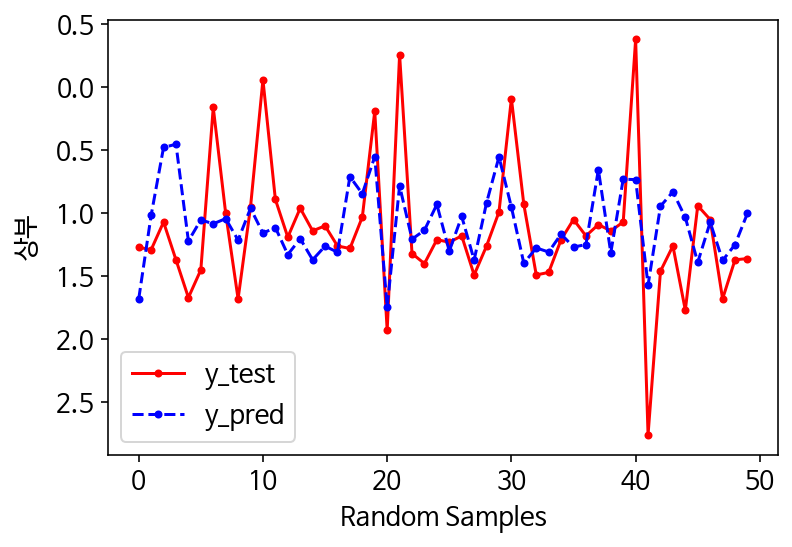

In [64]:
## 회귀 예측과 실제값 샘플 비교하기

def plot_reg_result(y_test, y_pred, N=50):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("상부")
    plt.show()

y_pred = lgbm_r.predict(X_test)
plot_reg_result(y_test, y_pred)